In [1]:
import os
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('../src')
sys.path.append('../../src')
from Library import VerboseLibrary
import matplotlib.colors as mcolors

named_colors = list(mcolors.TABLEAU_COLORS) * 3

device = 'cpu'#torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load Models

In [2]:
model_names = sorted(os.listdir('./models_R'))
len(model_names)

10

In [3]:
model_coefficient_history = {}
model_coefficient_mask = {}
model_coefficients = {}

for name in tqdm(model_names):
    model = torch.load(os.path.join('.', 'models_R', name)).to(device)
    model_coefficient_history[name] = np.array(model.coefficient_history)
    model_coefficients[name] = np.array(model.coefficient_mask.detach().cpu().numpy() * model.coefficients.detach().cpu().numpy())
    model_coefficient_mask[name] = np.array(model.coefficient_mask)

100%|██████████| 10/10 [00:02<00:00,  3.68it/s]


# Coefficients

In [4]:
masked_coefficient_list_float = np.array([model_coefficients[name].round(2) for name in model_names])

In [5]:
len(np.nonzero(masked_coefficient_list_float)[0]) / 10

12.2

In [6]:
masked_coefficient_list = np.array([model_coefficients[name].round(2).astype(str) for name in model_names])

In [7]:
masked_coefficient_list[(masked_coefficient_list == '0.0') | (masked_coefficient_list == '-0.0')] = '-'

In [8]:
# for i in range(3): pd.DataFrame(masked_coefficient_list[:, :, i], columns=['*'.join(l) for l in VerboseLibrary(model.library).build_verbose()]).to_csv(f'./R_lorenz_coefficients_j{i}')

In [ ]:
pd.DataFrame(masked_coefficient_list[:, :, 0], columns=['*'.join(l) for l in VerboseLibrary(model.library).build_verbose()])

1     z_1     z_2    z_3 z_1*z_1 z_1*z_2 z_1*z_3 z_2*z_2 z_2*z_3  \
0  1.43       -       -      -       -   -5.26       -    0.67       -   
1     -       -       -      -    0.35       -       -   -1.32   -0.98   
2  7.11   -2.89       -      -       -       -       -       -   -3.08   
3     -   -9.98  -10.47      -       -       -       -       -       -   
4     -   10.11       -      -   -0.26   -1.48       -    1.55       -   
5     -    0.56   -6.23      -       -       -    3.37       -    2.19   
6     -  -15.79   -1.84      -       -   -2.22    1.14    0.39     1.7   
7     -   -8.99       -  -5.52       -   -1.63   -1.95    2.33       -   
8     -       -       -      -       -    0.14       -       -   -9.44   
9  -7.0   -2.68       -      -       -       -       -   -0.25    2.98   

  z_3*z_3 z_1*z_1*z_1 z_1*z_1*z_2 z_1*z_1*z_3 z_1*z_2*z_2 z_1*z_2*z_3  \
0       -           -           -           -           -           -   
1    1.28           -           -           -           -           -   
2       -           -           -           -           -           -   
3       -           -           -           -           -           -   
4       -           -           -           -           -           -   
5       -           -           -           -           -           -   
6    -1.0           -           -           -           -           -   
7    -3.5           -           -           -           -           -   
8       -           -           -           -           -           -   
9       -           -           -           -           -           -   

  z_1*z_3*z_3 z_2*z_2*z_2 z_2*z_2*z_3 z_2*z_3*z_3 z_3*z_3*z_3  
0           -           -           -       -0.85           -  
1           -           -           -           -           -  
2           -           -           -           -           -  
3           -           -           -           -           -  
4       -0.42           -           -           -        0.38  
5           -           -           -           -           -  
6           -           -           -           -           -  
7           -           -           -           -           -  
8           -           -           -           -           -  
9           -           -           -           -           -

In [10]:
pd.DataFrame(masked_coefficient_list[:, :, 1], columns=['*'.join(l) for l in VerboseLibrary(model.library).build_verbose()])

1   z_1     z_2    z_3 z_1*z_1 z_1*z_2 z_1*z_3 z_2*z_2 z_2*z_3 z_3*z_3  \
0     -     -       -  -9.18   -1.35       -   -0.96       -     1.6       -   
1     -     -   12.39      -       -       -       -       -       -       -   
2     -     -       -      -       -       -    9.09       -       -       -   
3     -     -    -1.0      -       -       -   -9.72       -       -       -   
4     -     -  -12.64   -9.5    1.42   -1.46       -       -       -       -   
5     -     -  -11.43      -       -       -   -4.99       -   -3.29       -   
6  8.32     -       -      -    1.05   -0.88     2.0       -       -   -2.59   
7     -  3.82    2.91      -    0.83   -1.17       -       -    2.21   -2.59   
8  6.58     -   -2.73      -       -       -    2.87       -       -    0.19   
9     -     -  -11.02  11.12       -       -       -       -       -       -   

  z_1*z_1*z_1 z_1*z_1*z_2 z_1*z_1*z_3 z_1*z_2*z_2 z_1*z_2*z_3 z_1*z_3*z_3  \
0           -           -           -       -0.16           -           -   
1           -       -0.51       -0.63           -           -           -   
2           -           -           -           -           -           -   
3           -           -           -           -           -           -   
4           -           -           -           -           -           -   
5           -           -           -           -           -           -   
6           -           -           -           -           -           -   
7           -           -           -           -           -           -   
8           -           -           -           -           -           -   
9           -           -           -           -           -           -   

  z_2*z_2*z_2 z_2*z_2*z_3 z_2*z_3*z_3 z_3*z_3*z_3  
0           -           -           -           -  
1           -           -           -           -  
2           -           -           -           -  
3           -           -           -           -  
4           -           -        0.29        0.35  
5           -           -           -           -  
6           -           -           -           -  
7           -           -           -           -  
8           -           -           -           -  
9           -           -           -           -

In [11]:
pd.DataFrame(masked_coefficient_list[:, :, 2], columns=['*'.join(l) for l in VerboseLibrary(model.library).build_verbose()])

1     z_1    z_2     z_3 z_1*z_1 z_1*z_2 z_1*z_3 z_2*z_2 z_2*z_3  \
0      -    0.54      -       -       -       -       -       -    4.48   
1      -       -      -  -20.35       -   -1.74       -       -       -   
2      -       -  11.17  -10.75       -       -       -       -       -   
3   7.28       -      -   -2.67       -    2.96       -       -       -   
4      -       -  -6.55   -8.36    -1.1       -    1.44    1.01    1.15   
5   9.69       -      -   -2.71   -2.45       -       -     1.1       -   
6      -       -   6.19    2.32   -0.22   -2.54    0.71    0.43    2.18   
7  10.86   -4.63      -   -6.92    0.64       -    1.05   -1.38    1.69   
8      -  -11.25      -  -10.82       -       -       -       -       -   
9      -       -      -       -       -   -9.19       -       -       -   

  z_3*z_3 z_1*z_1*z_1 z_1*z_1*z_2 z_1*z_1*z_3 z_1*z_2*z_2 z_1*z_2*z_3  \
0    0.26           -        0.93           -           -        0.22   
1       -           -           -        0.41           -           -   
2       -           -           -           -           -           -   
3       -           -           -           -           -           -   
4       -           -           -           -           -           -   
5       -           -           -           -           -           -   
6   -0.62           -           -           -           -           -   
7       -           -           -           -           -           -   
8       -           -           -           -           -           -   
9       -           -           -           -           -           -   

  z_1*z_3*z_3 z_2*z_2*z_2 z_2*z_2*z_3 z_2*z_3*z_3 z_3*z_3*z_3  
0           -       -0.44           -           -           -  
1           -           -           -       -0.12           -  
2           -           -           -           -           -  
3           -           -           -           -           -  
4           -           -           -           -           -  
5           -           -           -           -           -  
6           -           -           -           -           -  
7           -           -           -           -           -  
8           -           -           -           -           -  
9           -           -           -           -           -

# Execute

In [10]:
model_order2_detected = {name: (np.where(model_coefficient_mask[name])[0] < 10).all() for name in model_names}
model_order3_detected = {name: (np.where(model_coefficient_mask[name])[0] >= 10).any() for name in model_names}

In [11]:
model_order2_detected_history = {name: model_coefficient_history[name][:, :10, 0] for name in model_names}
model_order3_detected_history = {name: model_coefficient_history[name][:, 10:, 0] for name in model_names}

100%|██████████| 10/10 [00:00<00:00, 108.47it/s]


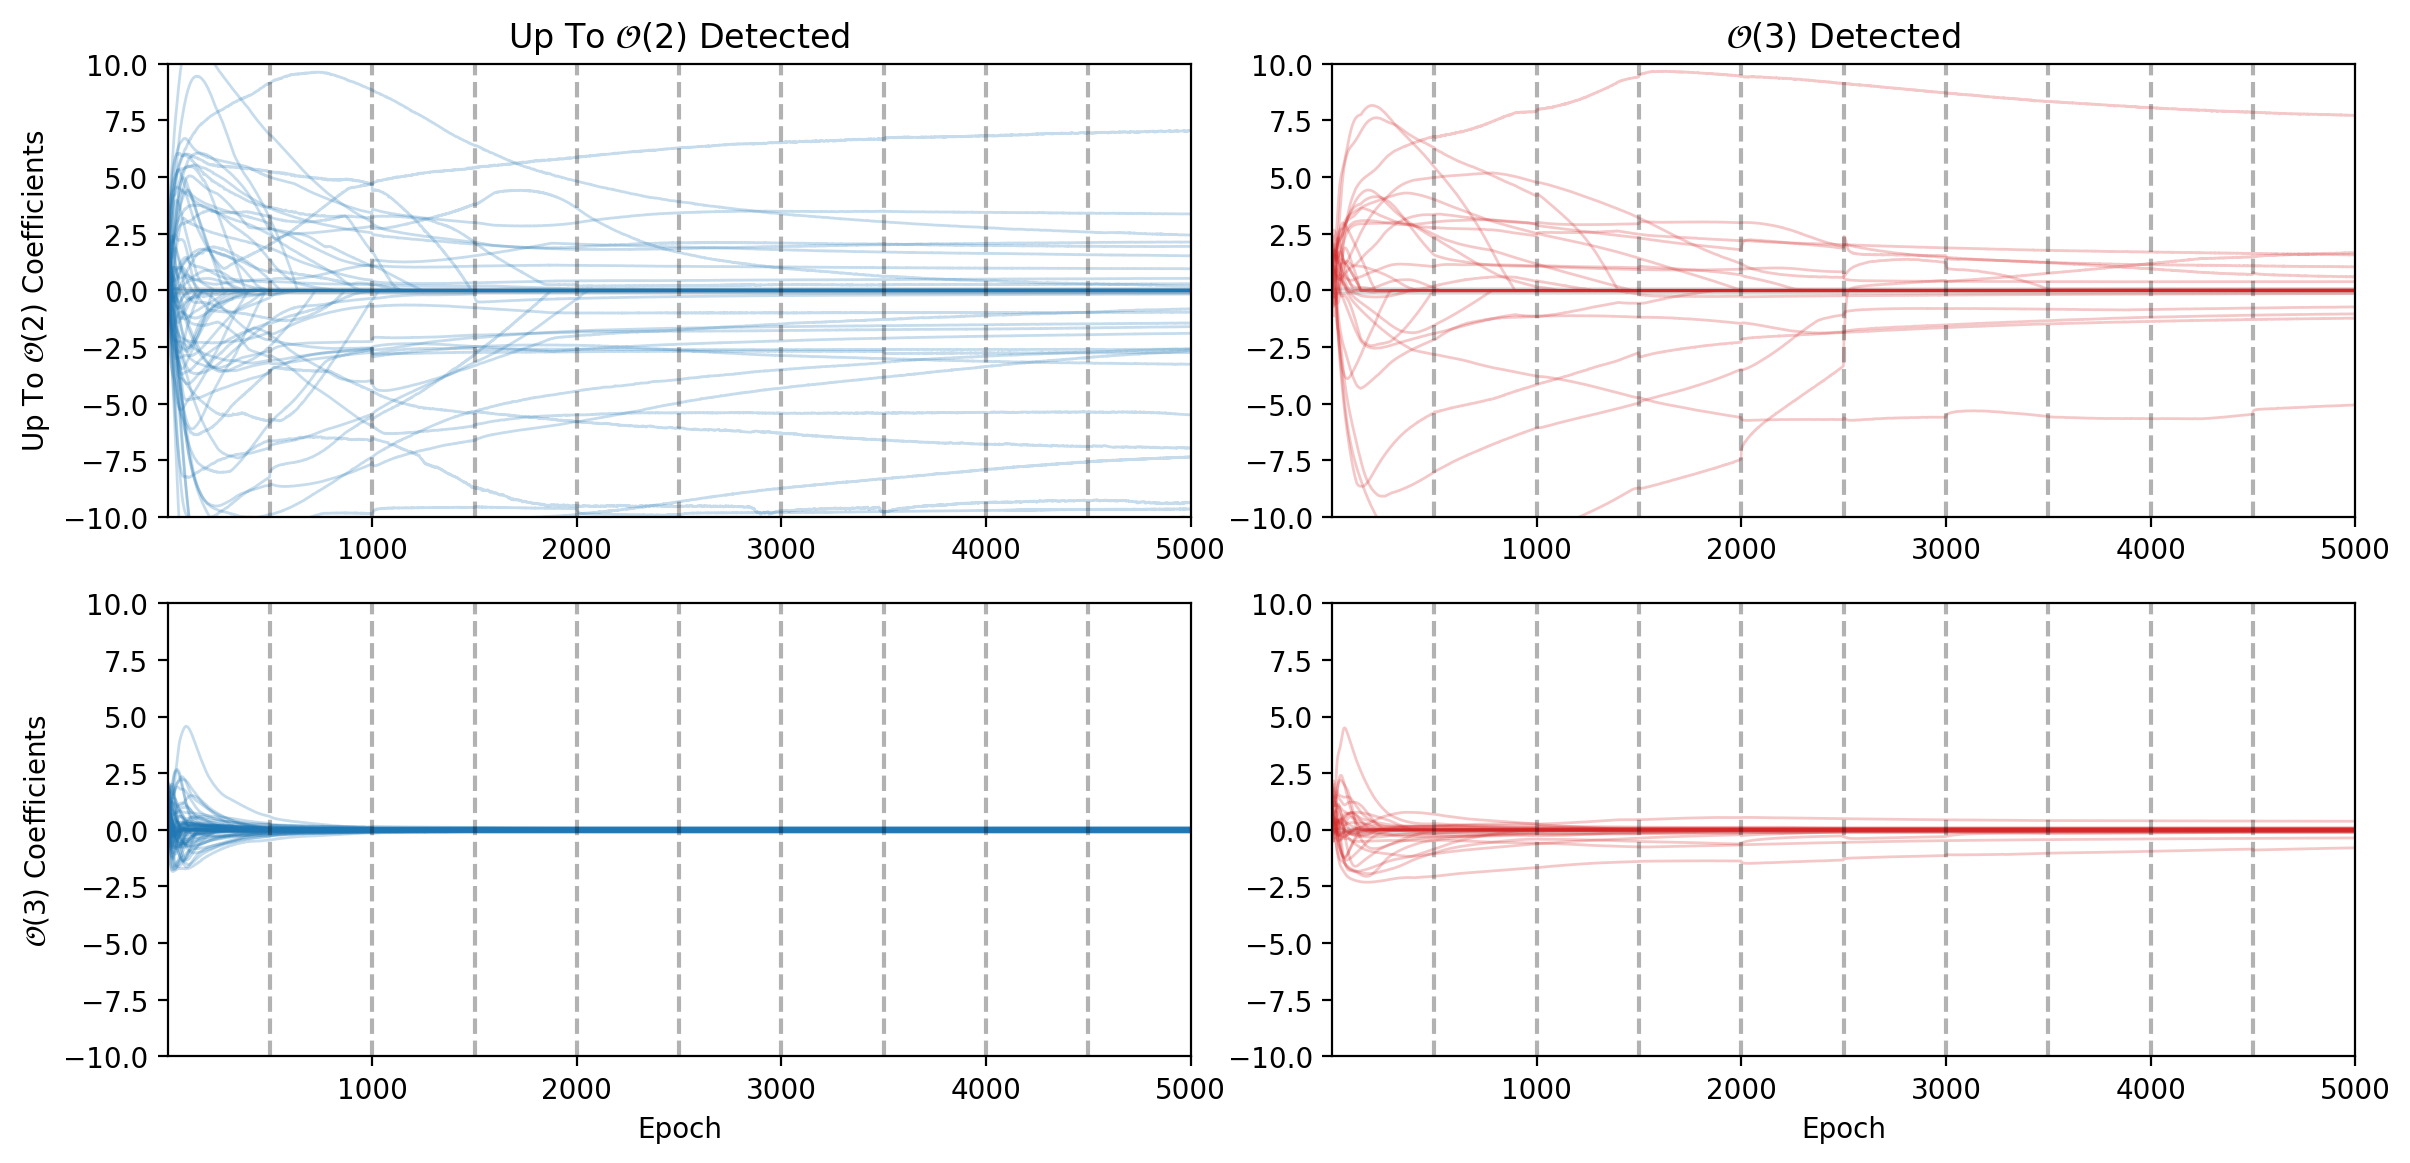

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(21/1.8, 10/1.8), dpi=200)
fig.tight_layout(w_pad=2, h_pad=1)
xlim = 5000

alpha = 0.25
linewidth = 1

for name in tqdm(model_names):
    if model_order2_detected[name]:
        axes[0][0].plot(model_order2_detected_history[name][:xlim], color='tab:blue', alpha=alpha, linewidth=linewidth);
        axes[1][0].plot(model_order3_detected_history[name][:xlim], color='tab:blue', alpha=alpha, linewidth=linewidth);
    if model_order3_detected[name]:
        axes[0][1].plot(model_order2_detected_history[name][:xlim], color='tab:red', alpha=alpha, linewidth=linewidth);
        axes[1][1].plot(model_order3_detected_history[name][:xlim], color='tab:red', alpha=alpha, linewidth=linewidth);

axes[0][0].set_title(r'Up To $\mathcal{O}(2)$ Detected');
axes[0][1].set_title(r'$\mathcal{O}(3)$ Detected');

axes[0][0].set_ylabel(r'Up To $\mathcal{O}(2)$ Coefficients');
axes[1][0].set_ylabel(r'$\mathcal{O}(3)$ Coefficients');

ylim = 10

for ax in axes[0]:
    ax.set_xlim(0, xlim); ax.axhspan(-0.1, 0.1, color='black', alpha=0.1);#ax.axhline(-0.1, color='black', linestyle='--', linewidth=1); ax.axhline(0.1, color='black', linestyle='--', linewidth=1);
    for threshold_epoch in np.arange(500, xlim, 500): ax.axvline(threshold_epoch, color='black', alpha=0.3, linestyle='--'); ax.set_ylim(-ylim, ylim); ax.set_xlim(1, None); #ax.set_xscale('log')

for ax in axes[1]:
    ax.set_xlabel('Epoch'); ax.set_xlim(0, xlim);  ax.axhspan(-0.1, 0.1, color='black', alpha=0.1);# ax.axhline(-0.1, color='black', linestyle='--', linewidth=1); ax.axhline(0.1, color='black', linestyle='--', linewidth=1);
    for threshold_epoch in np.arange(500, xlim, 500): ax.axvline(threshold_epoch, color='black', alpha=0.3, linestyle='--'); ax.set_ylim(-ylim, ylim); ax.set_xlim(1, None); #ax.set_xscale('log')

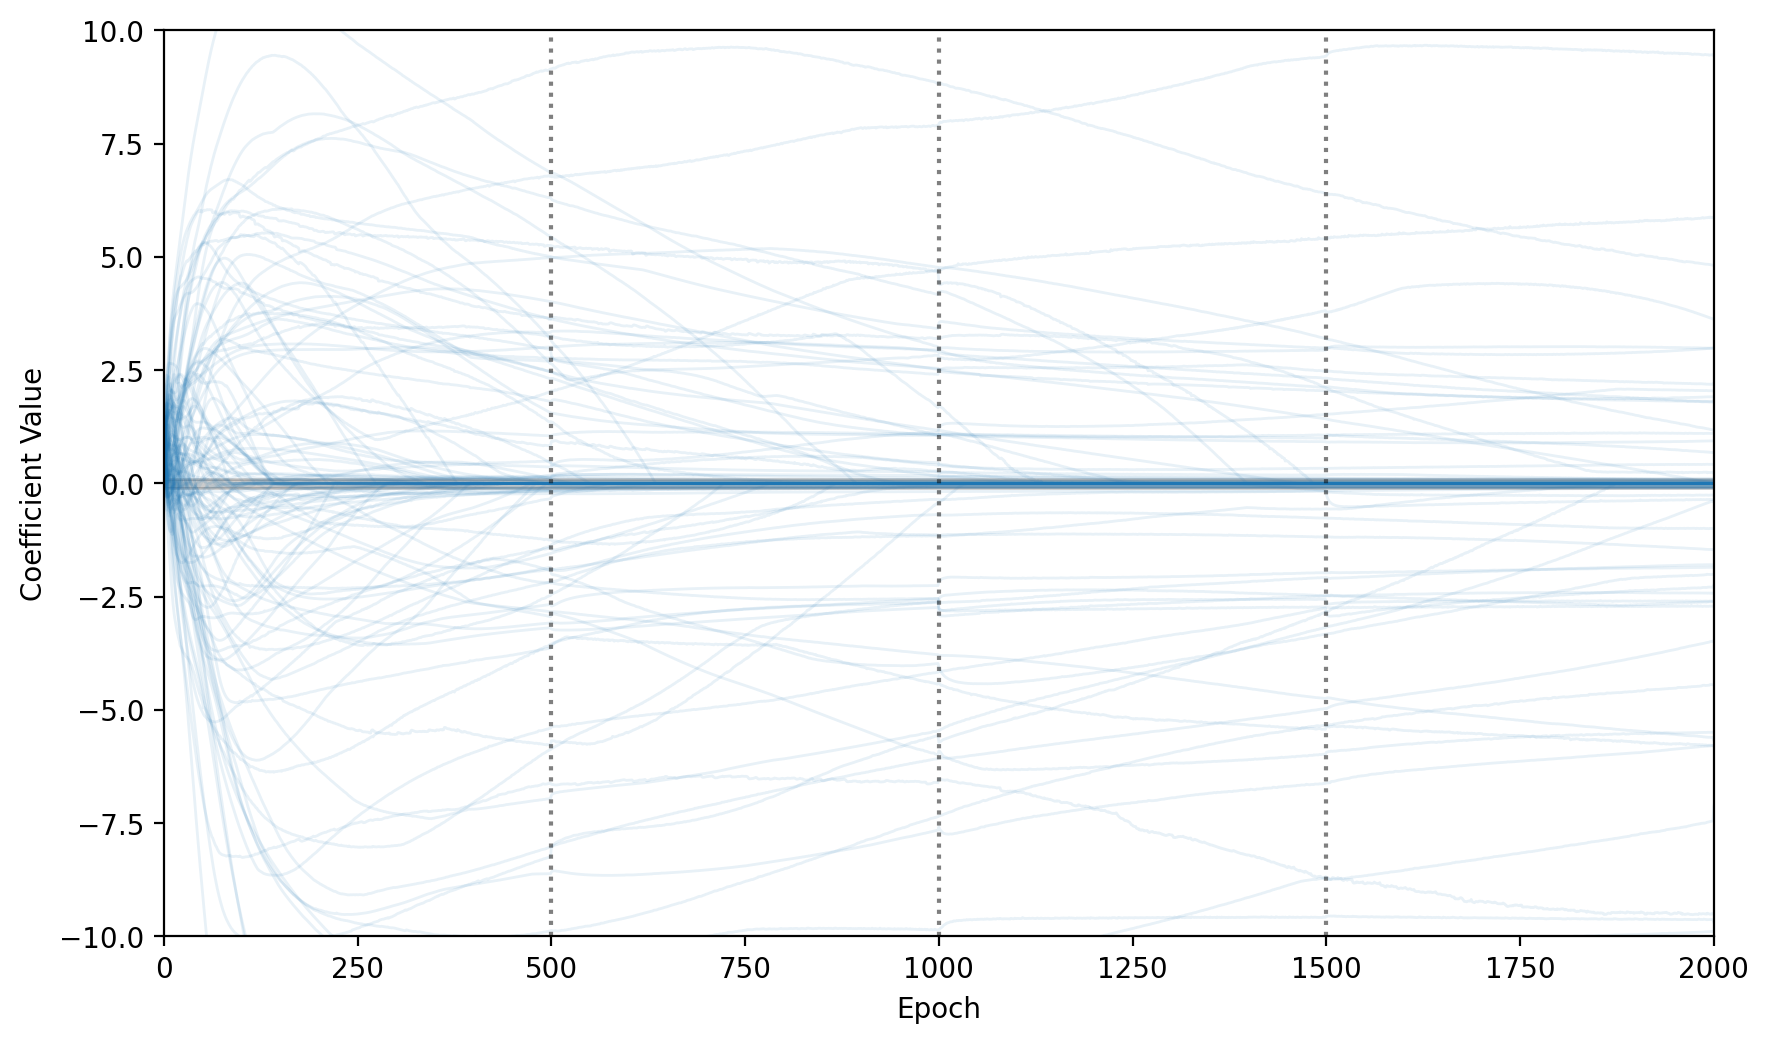

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=200)
for coefficient_history in model_coefficient_history.values():
    for i in range(12):
        ax.plot(np.arange(coefficient_history.shape[0]), coefficient_history[:, i, 0], color='tab:blue', alpha=0.1, linewidth=1)
ax.set_xlim(0, 2000); ax.set_ylim(-10, 10); ax.set_xlabel('Epoch'); ax.set_ylabel('Coefficient Value');
ax.axhspan(-0.1, 0.1, color='black', alpha=0.2); 
for threshold_epoch in np.arange(500, 2000, 500): ax.axvline(threshold_epoch, color='black', alpha=0.5, linestyle=':')

# Thresholding

In [14]:
def trend(a, lengthscale=5):
    mean_diff_last_values, var_last_values = np.mean(a[-2*lengthscale:-lengthscale], axis=0), np.var(a[-2*lengthscale:-lengthscale], axis=0)
    mean_diff_now_values, var_now_values = np.mean(a[-lengthscale:], axis=0), np.var(a[-lengthscale:], axis=0)
    return mean_diff_now_values - mean_diff_last_values, np.sqrt(var_last_values + var_now_values)

In [15]:
def trend_speed(a, lengthscale=5):
    if a.shape[0] > 2*lengthscale:
        return trend(a, lengthscale)[0]
    return np.zeros(a.shape[1:])

In [16]:
def trend_significance(a, lengthscale=5):
    if a.shape[0] > 2*lengthscale:
        t = trend(a, lengthscale)
        r = np.copy(t[0])
        r[(t[0] != 0) & (t[1] == 0)] = np.nan
        r[(t[0] != 0) & (t[1] != 0)] = t[0][(t[0] != 0) & (t[1] != 0)] / t[1][(t[0] != 0) & (t[1] != 0)]
        return r
    return np.zeros(a.shape[1:])

In [17]:
model_trend_significances = {}
model_trend_speed = {}
for name in model_names:
    model_trend_significances[name] = np.stack([trend_significance(model_coefficient_history[name][:i]) for i in range(6000)])
    model_trend_speed[name] = np.stack([trend_speed(model_coefficient_history[name][:i]) for i in range(6000)])

In [18]:
threshold_trial_epochs = np.arange(0, 5001, 500)

In [19]:
model_coefficient_activity_history = {name: (model_coefficient_history[name][threshold_trial_epochs + 20] - model_coefficient_history[name][threshold_trial_epochs + 19]).astype(bool) for name in model_names}
model_thresholded_trials = {name: np.where((~model_coefficient_activity_history[name][1:] & model_coefficient_activity_history[name][:-1])) for name in model_names}
model_thresholded_epochs = {name: ((model_thresholded_trials[name][0] + 1) * 500, model_thresholded_trials[name][1], model_thresholded_trials[name][2]) for name in model_names}
model_before_thresholded_epochs = {name: ((model_thresholded_trials[name][0] + 1) * 500 - 2, model_thresholded_trials[name][1], model_thresholded_trials[name][2]) for name in model_names}

model_before_thresholded_epochs[model_names[2]]

(array([ 498,  498,  498,  498,  498,  498,  498,  498,  498,  498,  498,
         498,  498,  498,  498,  498,  498,  498,  498,  498,  498,  498,
         498,  498,  998,  998,  998,  998,  998,  998,  998,  998,  998,
         998,  998, 1498, 1498, 1998, 2498, 2498, 2498, 2498, 2498, 2498,
        2498, 2498, 2498, 2998, 3998]),
 array([ 0,  0,  1,  2,  3,  4,  4,  6,  6,  8,  9, 10, 11, 12, 13, 13, 14,
        15, 16, 16, 17, 18, 19, 19,  1,  3,  7,  8, 10, 11, 13, 17, 17, 18,
        19, 14, 16, 14,  0,  1,  2,  5,  5,  7, 10, 15, 15,  9,  6]),
 array([0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0,
        0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2,
        0, 0, 1, 1, 1]))

In [20]:
model_thresholded_trend_speed_values = {name: model_trend_speed[name][model_before_thresholded_epochs[name]] for name in model_names}
model_thresholded_trend_significance_values = {name: model_trend_significances[name][model_thresholded_epochs[name]] for name in model_names}
model_thresholded_coefficient_values = {name: model_coefficient_history[name][model_thresholded_epochs[name]] for name in model_names}

In [21]:
all_models_thresholded_coefficient_values = []
all_models_thresholded_trend_significance_values = []
all_models_thresholded_trend_speed_values = []

for name in model_names:
    all_models_thresholded_coefficient_values.extend(model_thresholded_coefficient_values[name])
    all_models_thresholded_trend_significance_values.extend(model_thresholded_trend_significance_values[name])
    all_models_thresholded_trend_speed_values.extend(model_thresholded_trend_speed_values[name])

In [23]:
reasonable_cutoff = 0.2/5 # coefficient may change by double the ST-Zone in 5000 epochs
unreasonable_cutoff = 0.2/0.1 # coefficient may change by double the ST-Zone in 100 epochs

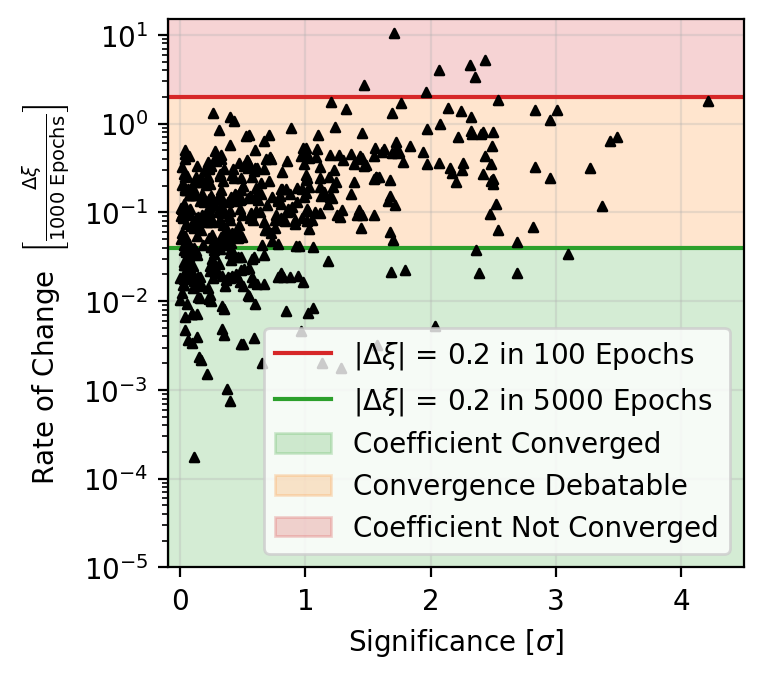

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6.5/1.8, 6/1.8), dpi=200)
fig.tight_layout(w_pad=5)

# dm in 5 Epochs 
# 200 * dm in 1000 Epochs
ax.scatter(np.abs(all_models_thresholded_trend_significance_values), np.abs(all_models_thresholded_trend_speed_values) * 200, color='black', marker='^', s=10, zorder=3);
ax.set_ylabel(r'Rate of Change  $\left[\frac{\Delta \xi}{1000 \,\,\mathrm{Epochs}}\right]$'); ax.set_xlabel(r'Significance $[\sigma]$'); ax.set_yscale('log'); ax.grid(alpha=0.3, zorder=1);
ax.axhspan(1e-6, reasonable_cutoff, color='tab:green', label='Coefficient Converged', alpha=0.2);
ax.axhspan(reasonable_cutoff, unreasonable_cutoff, color='tab:orange', label='Convergence Debatable', alpha=0.2);
ax.axhspan(unreasonable_cutoff, 100, color='tab:red', label='Coefficient Not Converged', alpha=0.2);
ax.axhline(unreasonable_cutoff, color='tab:red', label=r'$|\Delta \xi|$ = 0.2 in 100 Epochs')
ax.axhline(reasonable_cutoff, color='tab:green', label=r'$|\Delta \xi|$ = 0.2 in 5000 Epochs')
ax.set_ylim(1e-5, 15), ax.set_xlim(-0.1, 4.5); ax.legend();